In [92]:
print("Emory ID: 2582623")

Emory ID: 2582623


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("passwords.csv")

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [94]:
units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}

df['conversion_factor'] = df['time_unit'].map(units)
df['value_in_hours'] = df['value'] * df['conversion_factor']
df['value'] = df['value_in_hours']
df['time_unit'] = 'hours'
df = df.drop(columns=['conversion_factor', 'value_in_hours'])
print(df.head())

   rank  password             category         value time_unit  \
0   1.0  password     password-related  60531.600000     hours   
1   2.0    123456  simple-alphanumeric      0.308667     hours   
2   3.0  12345678  simple-alphanumeric     30.960000     hours   
3   4.0      1234  simple-alphanumeric      0.003086     hours   
4   5.0    qwerty  simple-alphanumeric     89.280000     hours   

   offline_crack_sec  rank_alt  strength  font_size  
0       2.170000e+00       1.0       8.0       11.0  
1       1.110000e-05       2.0       4.0        8.0  
2       1.110000e-03       3.0       4.0        8.0  
3       1.110000e-07       4.0       4.0        8.0  
4       3.210000e-03       5.0       8.0       11.0  


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [95]:
total_missing_values = df.isna().sum().sum()
missing_values_by_feature = df.isna().sum()
print(f"Total Missing Values in Data: {total_missing_values}\nMissing Values for Each Feature:\n{missing_values_by_feature}")
df.dropna(inplace=True)
print(f"\nMissing Values after using `dropna()`:\n{df.isna().sum()}")

Total Missing Values in Data: 99
Missing Values for Each Feature:
rank                  7
password              7
category              7
value                50
time_unit             0
offline_crack_sec     7
rank_alt              7
strength              7
font_size             7
dtype: int64

Missing Values after using `dropna()`:
rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64


3. Which password category has the highest average strength?


In [96]:
df['strength'] = pd.to_numeric(df['strength'], errors='coerce')
average_strength = df.groupby('category')['strength'].mean()
max_average_strength = average_strength.max()
category_with_highest_avg_strength = average_strength.idxmax()
print("Average strength per category:")
print(average_strength)
print(f"\nThe category with the highest average strength is '{category_with_highest_avg_strength}' with an average strength of {max_average_strength:.2f}.")

Average strength per category:
category
animal                  7.629630
cool-macho              7.229730
fluffy                  7.060606
food                    4.400000
name                    7.385542
nerdy-pop              13.035714
password-related        8.000000
rebellious-rude         6.727273
simple-alphanumeric     6.000000
sport                   8.000000
Name: strength, dtype: float64

The category with the highest average strength is 'nerdy-pop' with an average strength of 13.04.


4. What is the rank of the password 'qwerty'?

In [97]:
qwerty_row = df[df['password'] == 'qwerty']

qwerty_rank = qwerty_row['rank'].iloc[0]
print(f"The rank of the password 'qwerty' is {qwerty_rank}.")

The rank of the password 'qwerty' is 5.0.


5. How many passwords have more than 8 characters?

In [118]:
df['password_length'] = df['password'].apply(len)
passwords_over_8 = df[df['password_length'] > 8]
num_passwords_over_8 = passwords_over_8.shape[0]

# unnecessary but noticed it was 1 so did it because why not
def words(num_passwords):
    if num_passwords != 1:
        return ("are", "passwords")
    else:
        return("is", "password")

word1, word2 = words(num_passwords_over_8)

print(f"There {word1} {num_passwords_over_8} {word2} with more than 8 characters.")

There is 1 password with more than 8 characters.


6. How many passwords do not contain a number?

In [119]:
no_number_mask = ~df['password'].str.contains(r'\d')
num_passwords_no_number = no_number_mask.sum()

word1, word2 = words(num_passwords_no_number)

print(f"There {word1} {num_passwords_no_number} {word2} that do not contain a number.")

There are 407 passwords that do not contain a number.


7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [100]:
passwords_starting_with_123 = df[df['password'].str.startswith('123')]
average_time_123 = passwords_starting_with_123['value'].mean()
average_time_all = df['value'].mean()

print(f"Average time to crack passwords starting with '123': {average_time_123:.2f} hours")
print(f"Average time to crack all passwords: {average_time_all:.2f} hours")

Average time to crack passwords starting with '123': 120.33 hours
Average time to crack all passwords: 15226.74 hours


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [101]:
total_passwords = len(df)
num_simple_alphanumeric = df[df['category'] == 'simple-alphanumeric'].shape[0]
percentage_simple_alphanumeric = (num_simple_alphanumeric / total_passwords) * 100

print(f"Percentage of passwords in 'simple-alphanumeric' category: {percentage_simple_alphanumeric:.2f}%")

Percentage of passwords in 'simple-alphanumeric' category: 12.47%


9. How many passwords have a strength rating below 5? What is their percentage?

In [102]:
weak_passwords = df[df['strength'] < 5]
num_weak_passwords = weak_passwords.shape[0]
percentage_weak_passwords = (num_weak_passwords / total_passwords) * 100

print(f"Number of passwords with strength below 5: {num_weak_passwords}")
print(f"Percentage of passwords with strength below 5: {percentage_weak_passwords:.2f}%")

Number of passwords with strength below 5: 58
Percentage of passwords with strength below 5: 12.69%


10. What is the most common password in the dataset?

In [103]:
most_common_password = df[df['rank'] == 1]['password'].iloc[0]

print(f"The most common password in the dataset is: {most_common_password}")

The most common password in the dataset is: password


11. How many unique passwords are there in each category, and what is their average length?

In [104]:
df['password_length'] = df['password'].str.len()

category_stats = df.groupby('category').agg(
    unique_passwords=('password', 'nunique'),
    average_length=('password_length', 'mean')
).reset_index()

print(category_stats)

              category  unique_passwords  average_length
0               animal                27        6.296296
1           cool-macho                74        6.337838
2               fluffy                33        6.060606
3                 food                10        6.200000
4                 name               166        6.343373
5            nerdy-pop                28        6.678571
6     password-related                14        6.428571
7      rebellious-rude                11        6.363636
8  simple-alphanumeric                57        5.929825
9                sport                37        6.513514


12. What is the median rank and strength for passwords of each length?

In [105]:
length_stats = df.groupby('password_length').agg(
    median_rank=('rank', 'median'),
    median_strength=('strength', 'median')
).reset_index()

print(length_stats)

   password_length  median_rank  median_strength
0                4        326.0              6.0
1                5        410.0              4.0
2                6        231.0              7.0
3                7        223.0              8.0
4                8        286.0              8.0
5                9         49.0              4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [106]:
df['strength_label'] = df['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')

print(df[['password', 'strength', 'strength_label']].head())

   password  strength strength_label
0  password       8.0         strong
1    123456       4.0           weak
2  12345678       4.0           weak
3      1234       4.0           weak
4    qwerty       8.0         strong


14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [107]:
threshold_value = df['value'].quantile(0.9)
df['high_value'] = df['value'] >= threshold_value

print(df[['password', 'value', 'high_value']].head())

   password         value  high_value
0  password  60531.600000        True
1    123456      0.308667       False
2  12345678     30.960000       False
3      1234      0.003086       False
4    qwerty     89.280000       False


15. Join all passwords within each `category` into a single string.

In [108]:
passwords_joined = df.groupby('category')['password'].apply(' '.join).reset_index()

print(passwords_joined)

              category                                           password
0               animal  dragon monkey bigdog falcon phoenix tigers chi...
1           cool-macho  mustang shadow master harley hunter ranger bus...
2               fluffy  love sunshine silver orange ginger summer prin...
3                 food  pepper cheese coffee banana butter muffin hotd...
4                 name  michael jennifer jordan superman thomas tigger...
5            nerdy-pop  starwars computer merlin matrix snoopy boomer ...
6     password-related  password letmein test pass access gateway plea...
7      rebellious-rude  biteme freedom secret whatever badboy sexsex b...
8  simple-alphanumeric  123456 12345678 1234 qwerty 12345 696969 abc12...
9                sport  baseball football soccer hockey dallas yankees...


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

Correlation between password length and strength: 0.27


c:\Users\hossa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


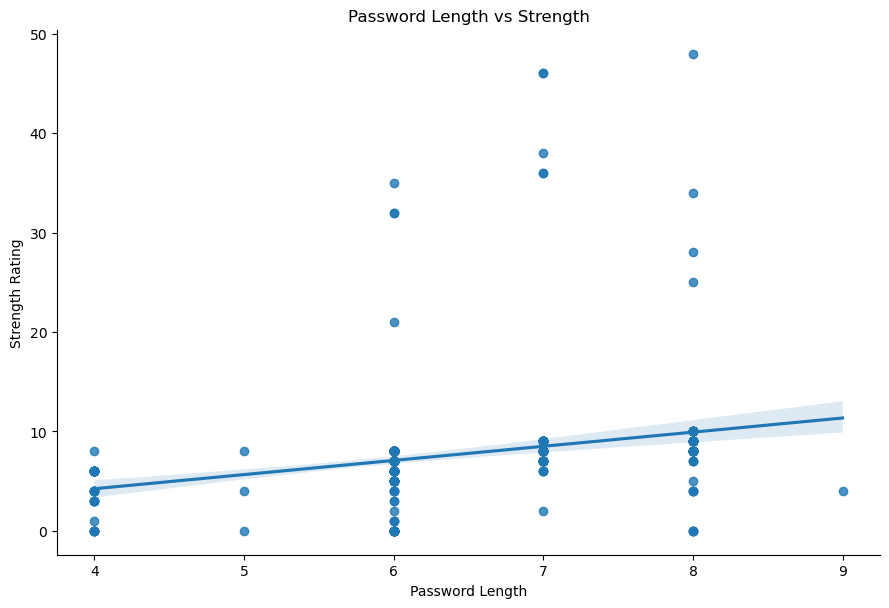

In [112]:
correlation = df['password_length'].corr(df['strength'])
print(f"Correlation between password length and strength: {correlation:.2f}")

sns.lmplot(x='password_length', y='strength', data=df, height=6, aspect=1.5)

plt.title('Password Length vs Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength Rating')

plt.show()

**Bonus question 02**: Find all passwords with palindromes.

In [113]:
def is_palindrome(s):
    s = str(s).lower()
    return s == s[::-1]

df['is_palindrome'] = df['password'].apply(is_palindrome)

palindrome_passwords = df[df['is_palindrome']]

print("Passwords that are palindromes:")
print(palindrome_passwords['password'].tolist())

Passwords that are palindromes:
['111111', '666666', '1111', 'aaaaaa', 'xxxxxx', 'hannah', '11111111', '222222', 'xxxxxxxx', '777777', '88888888', '2112', '7777', 'zzzzzz', '555555', '2222', '4444', '11111', '123321', '999999', '333333', 'xxxx', '888888']
